In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Conv2DTranspose, Concatenate, BatchNormalization, UpSampling2D
from keras.layers import  Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import backend as K
from keras.utils import plot_model
import tensorflow as tf
import glob
import random
import cv2
from random import shuffle

In [9]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xvzf images.tar.gz && tar -xvzf annotations.tar.gz
!rm  images/*.mat

--2019-05-19 23:51:48--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  8.53MB/s    in 94s     

2019-05-19 23:53:23 (8.03 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2019-05-19 23:53:23--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  6.12MB/s    in 3.0s    

2019-05-19 23:53:26 (6.12 MB/s)

images/Abyssinian_79.jpg
images/basset_hound_47.jpg
images/american_pit_bull_terrier_29.jpg
images/samoyed_79.jpg
images/boxer_33.jpg
images/Abyssinian_185.jpg
images/pomeranian_191.jpg
images/Maine_Coon_51.jpg
images/newfoundland_134.jpg
images/great_pyrenees_102.jpg
images/Egyptian_Mau_73.jpg
images/British_Shorthair_84.jpg
images/British_Shorthair_72.jpg
images/keeshond_151.jpg
images/keeshond_86.jpg
images/Bengal_125.jpg
images/english_cocker_spaniel_185.jpg
images/leonberger_143.jpg
images/shiba_inu_33.jpg
images/japanese_chin_78.jpg
images/wheaten_terrier_15.jpg
images/great_pyrenees_28.jpg
images/Maine_Coon_69.jpg
images/havanese_112.jpg
images/saint_bernard_173.jpg
images/Bombay_123.jpg
images/pug_23.jpg
images/chihuahua_20.jpg
images/Sphynx_246.jpg
images/english_cocker_spaniel_96.jpg
images/Russian_Blue_119.jpg
images/english_cocker_spaniel_57.jpg
images/Bombay_205.jpg
images/keeshond_190.jpg
images/pomeranian_87.jpg
images/basset_hound_113.jpg
images/beagle_148.jpg
images/Br

images/wheaten_terrier_34.jpg
images/staffordshire_bull_terrier_156.jpg
images/american_pit_bull_terrier_18.jpg
images/pug_168.jpg
images/pug_98.jpg
images/keeshond_195.jpg
images/english_setter_187.jpg
images/wheaten_terrier_30.jpg
images/scottish_terrier_111.jpg
images/Bombay_24.jpg
images/great_pyrenees_151.jpg
images/chihuahua_67.jpg
images/Birman_31.jpg
images/saint_bernard_40.jpg
images/Siamese_133.jpg
images/newfoundland_131.jpg
images/miniature_pinscher_23.jpg
images/miniature_pinscher_115.jpg
images/Birman_81.jpg
images/Russian_Blue_182.jpg
images/British_Shorthair_66.jpg
images/scottish_terrier_29.jpg
images/Abyssinian_155.jpg
images/Russian_Blue_129.jpg
images/scottish_terrier_138.jpg
images/shiba_inu_22.jpg
images/miniature_pinscher_168.jpg
images/pomeranian_157.jpg
images/leonberger_111.jpg
images/Russian_Blue_96.jpg
images/english_setter_32.jpg
images/Russian_Blue_118.jpg
images/shiba_inu_21.jpg
images/leonberger_82.jpg
images/english_cocker_spaniel_14.jpg
images/stafford

images/scottish_terrier_24.jpg
images/beagle_68.jpg
images/Russian_Blue_139.jpg
images/boxer_75.jpg
images/chihuahua_62.jpg
images/Birman_184.jpg
images/great_pyrenees_73.jpg
images/shiba_inu_130.jpg
images/Ragdoll_193.jpg
images/staffordshire_bull_terrier_173.jpg
images/Birman_183.jpg
images/Maine_Coon_103.jpg
images/wheaten_terrier_31.jpg
images/english_cocker_spaniel_27.jpg
images/Persian_3.jpg
images/newfoundland_17.jpg
images/japanese_chin_124.jpg
images/Bengal_138.jpg
images/keeshond_180.jpg
images/shiba_inu_57.jpg
images/Abyssinian_204.jpg
images/leonberger_132.jpg
images/British_Shorthair_74.jpg
images/wheaten_terrier_43.jpg
images/beagle_102.jpg
images/Siamese_106.jpg
images/chihuahua_92.jpg
images/Maine_Coon_104.jpg
images/British_Shorthair_149.jpg
images/British_Shorthair_163.jpg
images/havanese_45.jpg
images/leonberger_181.jpg
images/Bombay_25.jpg
images/Russian_Blue_78.jpg
images/pug_169.jpg
images/german_shorthaired_87.jpg
images/newfoundland_26.jpg
images/pomeranian_47.j

images/Bombay_105.jpg
images/Abyssinian_169.jpg
images/great_pyrenees_44.jpg
images/havanese_30.jpg
images/basset_hound_44.jpg
images/scottish_terrier_52.jpg
images/Maine_Coon_29.jpg
images/staffordshire_bull_terrier_27.jpg
images/newfoundland_5.jpg
images/english_setter_7.jpg
images/wheaten_terrier_28.jpg
images/leonberger_54.jpg
images/chihuahua_154.jpg
images/Maine_Coon_171.jpg
images/Egyptian_Mau_16.jpg
images/keeshond_14.jpg
images/Siamese_49.jpg
images/havanese_73.jpg
images/yorkshire_terrier_89.jpg
images/staffordshire_bull_terrier_92.jpg
images/Persian_91.jpg
images/leonberger_105.jpg
images/english_cocker_spaniel_179.jpg
images/saint_bernard_22.jpg
images/keeshond_112.jpg
images/havanese_119.jpg
images/basset_hound_122.jpg
images/scottish_terrier_87.jpg
images/Siamese_111.jpg
images/Birman_55.jpg
images/saint_bernard_28.jpg
images/Maine_Coon_253.jpg
images/Ragdoll_29.jpg
images/miniature_pinscher_146.jpg
images/japanese_chin_121.jpg
images/Sphynx_232.jpg
images/Russian_Blue_1.

images/Bengal_43.jpg
images/Egyptian_Mau_112.jpg
images/great_pyrenees_63.jpg
images/staffordshire_bull_terrier_127.jpg
images/keeshond_54.jpg
images/wheaten_terrier_122.jpg
images/miniature_pinscher_96.jpg
images/english_setter_135.jpg
images/Bombay_174.jpg
images/British_Shorthair_107.jpg
images/Birman_79.jpg
images/american_bulldog_108.jpg
images/pug_69.jpg
images/saint_bernard_26.jpg
images/saint_bernard_134.jpg
images/boxer_44.jpg
images/Siamese_216.jpg
images/great_pyrenees_92.jpg
images/pug_87.jpg
images/samoyed_143.jpg
images/japanese_chin_175.jpg
images/keeshond_133.jpg
images/yorkshire_terrier_167.jpg
images/basset_hound_57.jpg
images/Egyptian_Mau_132.jpg
images/Bengal_23.jpg
images/german_shorthaired_142.jpg
images/Birman_24.jpg
images/beagle_58.jpg
images/Birman_190.jpg
images/newfoundland_80.jpg
images/chihuahua_175.jpg
images/japanese_chin_119.jpg
images/Persian_169.jpg
images/Persian_41.jpg
images/samoyed_72.jpg
images/Russian_Blue_220.jpg
images/Maine_Coon_201.jpg
image

images/staffordshire_bull_terrier_15.jpg
images/Russian_Blue_76.jpg
images/samoyed_16.jpg
images/Birman_4.jpg
images/english_cocker_spaniel_133.jpg
images/Abyssinian_96.jpg
images/Maine_Coon_239.jpg
images/keeshond_28.jpg
images/great_pyrenees_196.jpg
images/Birman_126.jpg
images/yorkshire_terrier_157.jpg
images/scottish_terrier_43.jpg
images/samoyed_140.jpg
images/British_Shorthair_85.jpg
images/japanese_chin_40.jpg
images/american_pit_bull_terrier_183.jpg
images/miniature_pinscher_88.jpg
images/english_cocker_spaniel_149.jpg
images/great_pyrenees_189.jpg
images/Sphynx_239.jpg
images/havanese_101.jpg
images/american_bulldog_139.jpg
images/basset_hound_179.jpg
images/leonberger_2.jpg
images/scottish_terrier_125.jpg
images/Siamese_58.jpg
images/boxer_148.jpg
images/japanese_chin_156.jpg
images/beagle_59.jpg
images/Sphynx_200.jpg
images/Persian_256.jpg
images/american_pit_bull_terrier_41.jpg
images/staffordshire_bull_terrier_73.jpg
images/chihuahua_140.jpg
images/Bombay_98.jpg
images/eng

images/yorkshire_terrier_92.jpg
images/keeshond_9.jpg
images/Siamese_5.jpg
images/english_cocker_spaniel_176.jpg
images/keeshond_125.jpg
images/beagle_175.jpg
images/shiba_inu_18.jpg
images/Bengal_24.jpg
images/newfoundland_40.jpg
images/staffordshire_bull_terrier_147.jpg
images/german_shorthaired_174.jpg
images/german_shorthaired_164.jpg
images/Bengal_177.jpg
images/german_shorthaired_153.jpg
images/Bombay_185.jpg
images/wheaten_terrier_106.jpg
images/Egyptian_Mau_124.jpg
images/shiba_inu_154.jpg
images/British_Shorthair_168.jpg
images/american_pit_bull_terrier_103.jpg
images/saint_bernard_141.jpg
images/basset_hound_85.jpg
images/yorkshire_terrier_39.jpg
images/wheaten_terrier_54.jpg
images/great_pyrenees_56.jpg
images/British_Shorthair_87.jpg
images/leonberger_51.jpg
images/scottish_terrier_192.jpg
images/saint_bernard_98.jpg
images/yorkshire_terrier_113.jpg
images/great_pyrenees_67.jpg
images/Abyssinian_113.jpg
images/Bengal_159.jpg
images/german_shorthaired_168.jpg
images/chihuahu

images/english_setter_106.jpg
images/chihuahua_94.jpg
images/american_bulldog_90.jpg
images/scottish_terrier_124.jpg
images/english_setter_173.jpg
images/great_pyrenees_36.jpg
images/english_setter_183.jpg
images/Siamese_60.jpg
images/great_pyrenees_184.jpg
images/english_setter_19.jpg
images/boxer_144.jpg
images/Egyptian_Mau_56.jpg
images/Russian_Blue_199.jpg
images/english_cocker_spaniel_129.jpg
images/english_cocker_spaniel_63.jpg
images/leonberger_15.jpg
images/Sphynx_47.jpg
images/chihuahua_6.jpg
images/leonberger_102.jpg
images/english_setter_176.jpg
images/samoyed_45.jpg
images/British_Shorthair_269.jpg
images/american_pit_bull_terrier_45.jpg
images/Ragdoll_187.jpg
images/Russian_Blue_152.jpg
images/wheaten_terrier_98.jpg
images/american_pit_bull_terrier_178.jpg
images/great_pyrenees_76.jpg
images/yorkshire_terrier_194.jpg
images/newfoundland_159.jpg
images/american_bulldog_56.jpg
images/american_pit_bull_terrier_39.jpg
images/Birman_39.jpg
images/leonberger_20.jpg
images/englis

images/pomeranian_41.jpg
images/american_bulldog_40.jpg
images/Sphynx_119.jpg
images/german_shorthaired_119.jpg
images/Egyptian_Mau_14.jpg
images/yorkshire_terrier_100.jpg
images/Persian_139.jpg
images/staffordshire_bull_terrier_85.jpg
images/Russian_Blue_160.jpg
images/Bombay_42.jpg
images/newfoundland_86.jpg
images/Maine_Coon_16.jpg
images/american_pit_bull_terrier_43.jpg
images/Birman_187.jpg
images/english_cocker_spaniel_153.jpg
images/Persian_187.jpg
images/Sphynx_155.jpg
images/english_setter_84.jpg
images/Ragdoll_24.jpg
images/boxer_149.jpg
images/leonberger_115.jpg
images/Abyssinian_110.jpg
images/yorkshire_terrier_16.jpg
images/pug_52.jpg
images/japanese_chin_172.jpg
images/great_pyrenees_148.jpg
images/boxer_126.jpg
images/Bombay_171.jpg
images/boxer_163.jpg
images/english_setter_144.jpg
images/shiba_inu_189.jpg
images/yorkshire_terrier_52.jpg
images/boxer_177.jpg
images/staffordshire_bull_terrier_183.jpg
images/leonberger_117.jpg
images/shiba_inu_205.jpg
images/american_bull

images/great_pyrenees_144.jpg
images/Siamese_27.jpg
images/Sphynx_112.jpg
images/miniature_pinscher_185.jpg
images/english_cocker_spaniel_148.jpg
images/english_cocker_spaniel_93.jpg
images/chihuahua_194.jpg
images/scottish_terrier_154.jpg
images/shiba_inu_152.jpg
images/chihuahua_7.jpg
images/german_shorthaired_97.jpg
images/Sphynx_20.jpg
images/newfoundland_67.jpg
images/wheaten_terrier_95.jpg
images/english_cocker_spaniel_65.jpg
images/samoyed_1.jpg
images/shiba_inu_46.jpg
images/american_pit_bull_terrier_158.jpg
images/Abyssinian_168.jpg
images/beagle_202.jpg
images/english_cocker_spaniel_23.jpg
images/staffordshire_bull_terrier_159.jpg
images/english_setter_111.jpg
images/shiba_inu_31.jpg
images/american_pit_bull_terrier_94.jpg
images/boxer_47.jpg
images/great_pyrenees_169.jpg
images/Bengal_4.jpg
images/Bengal_112.jpg
images/staffordshire_bull_terrier_72.jpg
images/saint_bernard_21.jpg
images/Egyptian_Mau_175.jpg
images/chihuahua_149.jpg
images/scottish_terrier_186.jpg
images/amer

images/Birman_54.jpg
images/newfoundland_78.jpg
images/english_cocker_spaniel_113.jpg
images/american_pit_bull_terrier_130.jpg
images/miniature_pinscher_92.jpg
images/Maine_Coon_58.jpg
images/Siamese_70.jpg
images/Birman_115.jpg
images/saint_bernard_122.jpg
images/Abyssinian_149.jpg
images/Maine_Coon_193.jpg
images/miniature_pinscher_163.jpg
images/Egyptian_Mau_174.jpg
images/great_pyrenees_149.jpg
images/Abyssinian_67.jpg
images/japanese_chin_180.jpg
images/Abyssinian_224.jpg
images/leonberger_183.jpg
images/japanese_chin_52.jpg
images/newfoundland_101.jpg
images/Egyptian_Mau_117.jpg
images/Birman_180.jpg
images/Birman_172.jpg
images/pomeranian_86.jpg
images/chihuahua_176.jpg
images/american_pit_bull_terrier_163.jpg
images/staffordshire_bull_terrier_151.jpg
images/chihuahua_169.jpg
images/beagle_41.jpg
images/wheaten_terrier_200.jpg
images/scottish_terrier_99.jpg
images/Egyptian_Mau_128.jpg
images/havanese_108.jpg
images/saint_bernard_88.jpg
images/american_pit_bull_terrier_54.jpg
ima

images/samoyed_89.jpg
images/wheaten_terrier_152.jpg
images/Ragdoll_88.jpg
images/havanese_129.jpg
images/pomeranian_4.jpg
images/yorkshire_terrier_109.jpg
images/american_bulldog_50.jpg
images/scottish_terrier_153.jpg
images/boxer_85.jpg
images/Egyptian_Mau_87.jpg
images/basset_hound_48.jpg
images/Egyptian_Mau_70.jpg
images/Russian_Blue_131.jpg
images/Abyssinian_191.jpg
images/miniature_pinscher_188.jpg
images/american_bulldog_72.jpg
images/scottish_terrier_92.jpg
images/wheaten_terrier_145.jpg
images/keeshond_43.jpg
images/wheaten_terrier_50.jpg
images/British_Shorthair_2.jpg
images/Ragdoll_205.jpg
images/english_cocker_spaniel_102.jpg
images/wheaten_terrier_182.jpg
images/Persian_132.jpg
images/Birman_25.jpg
images/scottish_terrier_151.jpg
images/British_Shorthair_183.jpg
images/newfoundland_57.jpg
images/Russian_Blue_50.jpg
images/Maine_Coon_136.jpg
images/wheaten_terrier_55.jpg
images/British_Shorthair_135.jpg
images/boxer_135.jpg
images/newfoundland_166.jpg
images/pomeranian_125.

images/english_cocker_spaniel_32.jpg
images/Birman_145.jpg
images/miniature_pinscher_172.jpg
images/beagle_193.jpg
images/Maine_Coon_124.jpg
images/basset_hound_87.jpg
images/english_cocker_spaniel_15.jpg
images/newfoundland_24.jpg
images/japanese_chin_100.jpg
images/Siamese_196.jpg
images/american_pit_bull_terrier_147.jpg
images/Birman_189.jpg
images/Sphynx_199.jpg
images/beagle_104.jpg
images/wheaten_terrier_3.jpg
images/boxer_68.jpg
images/Siamese_155.jpg
images/boxer_146.jpg
images/Egyptian_Mau_152.jpg
images/yorkshire_terrier_8.jpg
images/chihuahua_192.jpg
images/chihuahua_72.jpg
images/Bengal_12.jpg
images/Siamese_9.jpg
images/keeshond_42.jpg
images/staffordshire_bull_terrier_13.jpg
images/basset_hound_151.jpg
images/Egyptian_Mau_30.jpg
images/Maine_Coon_138.jpg
images/Sphynx_28.jpg
images/Bengal_36.jpg
images/german_shorthaired_108.jpg
images/samoyed_34.jpg
images/pug_48.jpg
images/pug_112.jpg
images/saint_bernard_200.jpg
images/pomeranian_101.jpg
images/Siamese_170.jpg
images/S

images/keeshond_120.jpg
images/British_Shorthair_210.jpg
images/Maine_Coon_272.jpg
images/Russian_Blue_116.jpg
images/american_bulldog_193.jpg
images/British_Shorthair_134.jpg
images/havanese_127.jpg
images/havanese_156.jpg
images/Sphynx_39.jpg
images/Ragdoll_135.jpg
images/Maine_Coon_98.jpg
images/basset_hound_79.jpg
images/great_pyrenees_132.jpg
images/american_pit_bull_terrier_174.jpg
images/Egyptian_Mau_86.jpg
images/Bombay_5.jpg
images/miniature_pinscher_27.jpg
images/beagle_43.jpg
images/Russian_Blue_35.jpg
images/german_shorthaired_56.jpg
images/american_pit_bull_terrier_204.jpg
images/english_setter_41.jpg
images/yorkshire_terrier_187.jpg
images/german_shorthaired_6.jpg
images/saint_bernard_5.jpg
images/german_shorthaired_114.jpg
images/Bengal_132.jpg
images/english_setter_42.jpg
images/great_pyrenees_50.jpg
images/basset_hound_150.jpg
images/Siamese_98.jpg
images/pomeranian_124.jpg
images/Birman_88.jpg
images/newfoundland_97.jpg
images/staffordshire_bull_terrier_172.jpg
images

images/american_bulldog_104.jpg
images/Birman_188.jpg
images/japanese_chin_109.jpg
images/chihuahua_190.jpg
images/yorkshire_terrier_117.jpg
images/Maine_Coon_14.jpg
images/leonberger_88.jpg
images/Siamese_161.jpg
images/keeshond_34.jpg
images/beagle_51.jpg
images/beagle_98.jpg
images/american_bulldog_12.jpg
images/newfoundland_181.jpg
images/Maine_Coon_214.jpg
images/pug_167.jpg
images/boxer_93.jpg
images/english_cocker_spaniel_80.jpg
images/american_pit_bull_terrier_12.jpg
images/Persian_228.jpg
images/staffordshire_bull_terrier_77.jpg
images/american_pit_bull_terrier_179.jpg
images/newfoundland_31.jpg
images/Abyssinian_66.jpg
images/samoyed_117.jpg
images/Maine_Coon_61.jpg
images/samoyed_167.jpg
images/British_Shorthair_218.jpg
images/saint_bernard_165.jpg
images/Siamese_103.jpg
images/wheaten_terrier_66.jpg
images/Ragdoll_204.jpg
images/newfoundland_142.jpg
images/english_setter_46.jpg
images/wheaten_terrier_100.jpg
images/boxer_83.jpg
images/Ragdoll_250.jpg
images/havanese_54.jpg


images/american_pit_bull_terrier_81.jpg
images/chihuahua_161.jpg
images/shiba_inu_35.jpg
images/basset_hound_27.jpg
images/Maine_Coon_131.jpg
images/havanese_20.jpg
images/Bombay_131.jpg
images/american_bulldog_30.jpg
images/american_bulldog_35.jpg
images/chihuahua_108.jpg
images/english_setter_175.jpg
images/scottish_terrier_40.jpg
images/Persian_170.jpg
images/basset_hound_98.jpg
images/British_Shorthair_154.jpg
images/english_setter_8.jpg
images/havanese_179.jpg
images/shiba_inu_206.jpg
images/Siamese_120.jpg
images/chihuahua_197.jpg
images/Birman_186.jpg
images/german_shorthaired_93.jpg
images/Birman_33.jpg
images/Persian_12.jpg
images/Siamese_53.jpg
images/pug_103.jpg
images/Abyssinian_141.jpg
images/Ragdoll_137.jpg
images/german_shorthaired_161.jpg
images/shiba_inu_107.jpg
images/Sphynx_189.jpg
images/Egyptian_Mau_74.jpg
images/english_setter_125.jpg
images/boxer_100.jpg
images/japanese_chin_157.jpg
images/British_Shorthair_62.jpg
images/British_Shorthair_209.jpg
images/yorkshire

images/Bombay_221.jpg
images/Egyptian_Mau_178.jpg
images/boxer_38.jpg
images/Siamese_108.jpg
images/Egyptian_Mau_122.jpg
images/basset_hound_134.jpg
images/great_pyrenees_171.jpg
images/staffordshire_bull_terrier_32.jpg
images/newfoundland_93.jpg
images/Persian_42.jpg
images/Maine_Coon_184.jpg
images/newfoundland_87.jpg
images/Sphynx_15.jpg
images/Siamese_186.jpg
images/english_setter_95.jpg
images/american_pit_bull_terrier_36.jpg
images/Persian_55.jpg
images/pomeranian_137.jpg
images/boxer_121.jpg
images/leonberger_31.jpg
images/Bengal_40.jpg
images/Bombay_130.jpg
images/Bombay_71.jpg
images/german_shorthaired_195.jpg
images/boxer_116.jpg
images/saint_bernard_27.jpg
images/japanese_chin_200.jpg
images/Egyptian_Mau_15.jpg
images/wheaten_terrier_63.jpg
images/Egyptian_Mau_172.jpg
images/english_setter_129.jpg
images/beagle_27.jpg
images/english_cocker_spaniel_4.jpg
images/havanese_104.jpg
images/keeshond_105.jpg
images/miniature_pinscher_127.jpg
images/english_setter_105.jpg
images/Russ

images/wheaten_terrier_160.jpg
images/Bengal_130.jpg
images/leonberger_195.jpg
images/english_cocker_spaniel_36.jpg
images/great_pyrenees_178.jpg
images/samoyed_86.jpg
images/pomeranian_129.jpg
images/american_pit_bull_terrier_129.jpg
images/japanese_chin_15.jpg
images/shiba_inu_23.jpg
images/american_bulldog_110.jpg
images/pug_129.jpg
images/Egyptian_Mau_212.jpg
images/miniature_pinscher_9.jpg
images/Egyptian_Mau_162.jpg
images/great_pyrenees_53.jpg
images/Persian_263.jpg
images/keeshond_147.jpg
images/Ragdoll_192.jpg
images/Abyssinian_80.jpg
images/yorkshire_terrier_128.jpg
images/german_shorthaired_145.jpg
images/Persian_239.jpg
images/staffordshire_bull_terrier_65.jpg
images/Birman_178.jpg
images/Bombay_65.jpg
images/chihuahua_28.jpg
images/havanese_178.jpg
images/english_setter_123.jpg
images/basset_hound_71.jpg
images/great_pyrenees_59.jpg
images/scottish_terrier_66.jpg
images/Abyssinian_118.jpg
images/staffordshire_bull_terrier_83.jpg
images/leonberger_113.jpg
images/staffordshi

images/Egyptian_Mau_136.jpg
images/wheaten_terrier_131.jpg
images/shiba_inu_135.jpg
images/staffordshire_bull_terrier_49.jpg
images/basset_hound_10.jpg
images/english_setter_179.jpg
images/chihuahua_174.jpg
images/Birman_84.jpg
images/Bengal_86.jpg
images/japanese_chin_1.jpg
images/Siamese_207.jpg
images/japanese_chin_125.jpg
images/shiba_inu_204.jpg
images/samoyed_154.jpg
images/Bengal_2.jpg
images/keeshond_171.jpg
images/wheaten_terrier_73.jpg
images/american_bulldog_92.jpg
images/newfoundland_10.jpg
images/Abyssinian_54.jpg
images/keeshond_169.jpg
images/Bengal_100.jpg
images/Siamese_137.jpg
images/german_shorthaired_128.jpg
images/Bombay_13.jpg
images/shiba_inu_106.jpg
images/leonberger_83.jpg
images/samoyed_173.jpg
images/german_shorthaired_98.jpg
images/shiba_inu_127.jpg
images/British_Shorthair_223.jpg
images/Abyssinian_177.jpg
images/samoyed_93.jpg
images/havanese_160.jpg
images/yorkshire_terrier_166.jpg
images/yorkshire_terrier_189.jpg
images/Maine_Coon_128.jpg
images/english_

images/scottish_terrier_143.jpg
images/basset_hound_75.jpg
images/pug_159.jpg
images/newfoundland_175.jpg
images/Bombay_116.jpg
images/Sphynx_57.jpg
images/Siamese_188.jpg
images/great_pyrenees_156.jpg
images/boxer_14.jpg
images/Russian_Blue_137.jpg
images/beagle_6.jpg
images/leonberger_39.jpg
images/Sphynx_230.jpg
images/chihuahua_152.jpg
images/miniature_pinscher_123.jpg
images/pomeranian_190.jpg
images/Sphynx_40.jpg
images/Egyptian_Mau_196.jpg
images/american_pit_bull_terrier_166.jpg
images/Russian_Blue_113.jpg
images/beagle_5.jpg
images/Maine_Coon_35.jpg
images/keeshond_97.jpg
images/leonberger_184.jpg
images/samoyed_111.jpg
images/newfoundland_65.jpg
images/yorkshire_terrier_83.jpg
images/saint_bernard_35.jpg
images/Bombay_184.jpg
images/miniature_pinscher_89.jpg
images/japanese_chin_34.jpg
images/Persian_192.jpg
images/Egyptian_Mau_71.jpg
images/yorkshire_terrier_110.jpg
images/Egyptian_Mau_140.jpg
images/Bombay_194.jpg
images/beagle_122.jpg
images/shiba_inu_126.jpg
images/Persia

images/Sphynx_165.jpg
images/Bombay_193.jpg
images/chihuahua_127.jpg
images/havanese_32.jpg
images/pug_38.jpg
images/Siamese_203.jpg
images/american_bulldog_57.jpg
images/Birman_95.jpg
images/pug_121.jpg
images/beagle_141.jpg
images/staffordshire_bull_terrier_70.jpg
images/British_Shorthair_36.jpg
images/beagle_169.jpg
images/staffordshire_bull_terrier_76.jpg
images/yorkshire_terrier_173.jpg
images/beagle_3.jpg
images/Abyssinian_52.jpg
images/staffordshire_bull_terrier_58.jpg
images/havanese_13.jpg
images/Bombay_172.jpg
images/Persian_103.jpg
images/boxer_1.jpg
images/pomeranian_29.jpg
images/saint_bernard_105.jpg
images/leonberger_187.jpg
images/Abyssinian_1.jpg
images/Maine_Coon_89.jpg
images/Birman_64.jpg
images/scottish_terrier_17.jpg
images/boxer_168.jpg
images/Bengal_33.jpg
images/english_setter_159.jpg
images/american_pit_bull_terrier_46.jpg
images/japanese_chin_162.jpg
images/Birman_117.jpg
images/chihuahua_148.jpg
images/Siamese_80.jpg
images/basset_hound_9.jpg
images/Birman_1

images/havanese_124.jpg
images/havanese_47.jpg
images/great_pyrenees_78.jpg
images/Russian_Blue_170.jpg
images/english_cocker_spaniel_58.jpg
images/Persian_43.jpg
images/american_bulldog_34.jpg
images/yorkshire_terrier_169.jpg
images/chihuahua_33.jpg
images/chihuahua_24.jpg
images/english_setter_163.jpg
images/yorkshire_terrier_135.jpg
images/newfoundland_16.jpg
images/samoyed_67.jpg
images/german_shorthaired_64.jpg
images/samoyed_49.jpg
images/Ragdoll_16.jpg
images/shiba_inu_137.jpg
images/chihuahua_16.jpg
images/wheaten_terrier_159.jpg
images/japanese_chin_18.jpg
images/keeshond_95.jpg
images/Siamese_115.jpg
images/english_cocker_spaniel_55.jpg
images/chihuahua_64.jpg
images/Sphynx_78.jpg
images/Russian_Blue_165.jpg
images/american_pit_bull_terrier_181.jpg
images/yorkshire_terrier_193.jpg
images/Bombay_85.jpg
images/samoyed_157.jpg
images/Bombay_74.jpg
images/Ragdoll_4.jpg
images/english_cocker_spaniel_175.jpg
images/chihuahua_53.jpg
images/basset_hound_29.jpg
images/shiba_inu_64.jpg

annotations/xmls/Bombay_138.xml
annotations/xmls/Bombay_139.xml
annotations/xmls/Bombay_14.xml
annotations/xmls/Bombay_140.xml
annotations/xmls/Bombay_141.xml
annotations/xmls/Bombay_143.xml
annotations/xmls/Bombay_144.xml
annotations/xmls/Bombay_145.xml
annotations/xmls/Bombay_146.xml
annotations/xmls/Bombay_148.xml
annotations/xmls/Bombay_15.xml
annotations/xmls/Bombay_150.xml
annotations/xmls/Bombay_151.xml
annotations/xmls/Bombay_152.xml
annotations/xmls/Bombay_153.xml
annotations/xmls/Bombay_154.xml
annotations/xmls/Bombay_155.xml
annotations/xmls/Bombay_156.xml
annotations/xmls/Bombay_157.xml
annotations/xmls/Bombay_158.xml
annotations/xmls/Bombay_159.xml
annotations/xmls/Bombay_16.xml
annotations/xmls/Bombay_160.xml
annotations/xmls/Bombay_161.xml
annotations/xmls/Bombay_162.xml
annotations/xmls/Bombay_163.xml
annotations/xmls/Bombay_164.xml
annotations/xmls/Bombay_166.xml
annotations/xmls/Bombay_167.xml
annotations/xmls/Bombay_168.xml
annotations/xmls/Bombay_169.xml
annotations

annotations/xmls/newfoundland_149.xml
annotations/xmls/newfoundland_15.xml
annotations/xmls/newfoundland_150.xml
annotations/xmls/newfoundland_151.xml
annotations/xmls/newfoundland_152.xml
annotations/xmls/newfoundland_153.xml
annotations/xmls/newfoundland_154.xml
annotations/xmls/newfoundland_155.xml
annotations/xmls/newfoundland_156.xml
annotations/xmls/newfoundland_157.xml
annotations/xmls/newfoundland_158.xml
annotations/xmls/newfoundland_159.xml
annotations/xmls/newfoundland_16.xml
annotations/xmls/newfoundland_160.xml
annotations/xmls/newfoundland_161.xml
annotations/xmls/newfoundland_162.xml
annotations/xmls/newfoundland_163.xml
annotations/xmls/newfoundland_164.xml
annotations/xmls/newfoundland_165.xml
annotations/xmls/newfoundland_166.xml
annotations/xmls/newfoundland_167.xml
annotations/xmls/newfoundland_168.xml
annotations/xmls/newfoundland_169.xml
annotations/xmls/newfoundland_17.xml
annotations/xmls/newfoundland_170.xml
annotations/xmls/newfoundland_171.xml
annotations/xml

annotations/trimaps/._Abyssinian_156.png
annotations/trimaps/Abyssinian_156.png
annotations/trimaps/._Abyssinian_157.png
annotations/trimaps/Abyssinian_157.png
annotations/trimaps/._Abyssinian_158.png
annotations/trimaps/Abyssinian_158.png
annotations/trimaps/._Abyssinian_159.png
annotations/trimaps/Abyssinian_159.png
annotations/trimaps/._Abyssinian_16.png
annotations/trimaps/Abyssinian_16.png
annotations/trimaps/._Abyssinian_160.png
annotations/trimaps/Abyssinian_160.png
annotations/trimaps/._Abyssinian_161.png
annotations/trimaps/Abyssinian_161.png
annotations/trimaps/._Abyssinian_164.png
annotations/trimaps/Abyssinian_164.png
annotations/trimaps/._Abyssinian_165.png
annotations/trimaps/Abyssinian_165.png
annotations/trimaps/._Abyssinian_166.png
annotations/trimaps/Abyssinian_166.png
annotations/trimaps/._Abyssinian_167.png
annotations/trimaps/Abyssinian_167.png
annotations/trimaps/._Abyssinian_168.png
annotations/trimaps/Abyssinian_168.png
annotations/trimaps/._Abyssinian_169.png
a

annotations/trimaps/._beagle_136.png
annotations/trimaps/beagle_136.png
annotations/trimaps/._beagle_137.png
annotations/trimaps/beagle_137.png
annotations/trimaps/._beagle_138.png
annotations/trimaps/beagle_138.png
annotations/trimaps/._beagle_139.png
annotations/trimaps/beagle_139.png
annotations/trimaps/._beagle_14.png
annotations/trimaps/beagle_14.png
annotations/trimaps/._beagle_140.png
annotations/trimaps/beagle_140.png
annotations/trimaps/._beagle_141.png
annotations/trimaps/beagle_141.png
annotations/trimaps/._beagle_142.png
annotations/trimaps/beagle_142.png
annotations/trimaps/._beagle_143.png
annotations/trimaps/beagle_143.png
annotations/trimaps/._beagle_144.png
annotations/trimaps/beagle_144.png
annotations/trimaps/._beagle_145.png
annotations/trimaps/beagle_145.png
annotations/trimaps/._beagle_146.png
annotations/trimaps/beagle_146.png
annotations/trimaps/._beagle_147.png
annotations/trimaps/beagle_147.png
annotations/trimaps/._beagle_148.png
annotations/trimaps/beagle_14

annotations/trimaps/._boxer_1.png
annotations/trimaps/boxer_1.png
annotations/trimaps/._boxer_10.png
annotations/trimaps/boxer_10.png
annotations/trimaps/._boxer_100.png
annotations/trimaps/boxer_100.png
annotations/trimaps/._boxer_101.png
annotations/trimaps/boxer_101.png
annotations/trimaps/._boxer_102.png
annotations/trimaps/boxer_102.png
annotations/trimaps/._boxer_103.png
annotations/trimaps/boxer_103.png
annotations/trimaps/._boxer_104.png
annotations/trimaps/boxer_104.png
annotations/trimaps/._boxer_105.png
annotations/trimaps/boxer_105.png
annotations/trimaps/._boxer_106.png
annotations/trimaps/boxer_106.png
annotations/trimaps/._boxer_107.png
annotations/trimaps/boxer_107.png
annotations/trimaps/._boxer_108.png
annotations/trimaps/boxer_108.png
annotations/trimaps/._boxer_109.png
annotations/trimaps/boxer_109.png
annotations/trimaps/._boxer_11.png
annotations/trimaps/boxer_11.png
annotations/trimaps/._boxer_110.png
annotations/trimaps/boxer_110.png
annotations/trimaps/._boxer_

annotations/trimaps/Egyptian_Mau_44.png
annotations/trimaps/._Egyptian_Mau_45.png
annotations/trimaps/Egyptian_Mau_45.png
annotations/trimaps/._Egyptian_Mau_46.png
annotations/trimaps/Egyptian_Mau_46.png
annotations/trimaps/._Egyptian_Mau_47.png
annotations/trimaps/Egyptian_Mau_47.png
annotations/trimaps/._Egyptian_Mau_48.png
annotations/trimaps/Egyptian_Mau_48.png
annotations/trimaps/._Egyptian_Mau_49.png
annotations/trimaps/Egyptian_Mau_49.png
annotations/trimaps/._Egyptian_Mau_5.png
annotations/trimaps/Egyptian_Mau_5.png
annotations/trimaps/._Egyptian_Mau_50.png
annotations/trimaps/Egyptian_Mau_50.png
annotations/trimaps/._Egyptian_Mau_51.png
annotations/trimaps/Egyptian_Mau_51.png
annotations/trimaps/._Egyptian_Mau_52.png
annotations/trimaps/Egyptian_Mau_52.png
annotations/trimaps/._Egyptian_Mau_53.png
annotations/trimaps/Egyptian_Mau_53.png
annotations/trimaps/._Egyptian_Mau_54.png
annotations/trimaps/Egyptian_Mau_54.png
annotations/trimaps/._Egyptian_Mau_56.png
annotations/trimap

annotations/trimaps/great_pyrenees_177.png
annotations/trimaps/._great_pyrenees_178.png
annotations/trimaps/great_pyrenees_178.png
annotations/trimaps/._great_pyrenees_179.png
annotations/trimaps/great_pyrenees_179.png
annotations/trimaps/._great_pyrenees_18.png
annotations/trimaps/great_pyrenees_18.png
annotations/trimaps/._great_pyrenees_180.png
annotations/trimaps/great_pyrenees_180.png
annotations/trimaps/._great_pyrenees_181.png
annotations/trimaps/great_pyrenees_181.png
annotations/trimaps/._great_pyrenees_182.png
annotations/trimaps/great_pyrenees_182.png
annotations/trimaps/._great_pyrenees_183.png
annotations/trimaps/great_pyrenees_183.png
annotations/trimaps/._great_pyrenees_184.png
annotations/trimaps/great_pyrenees_184.png
annotations/trimaps/._great_pyrenees_185.png
annotations/trimaps/great_pyrenees_185.png
annotations/trimaps/._great_pyrenees_186.png
annotations/trimaps/great_pyrenees_186.png
annotations/trimaps/._great_pyrenees_187.png
annotations/trimaps/great_pyrenees

annotations/trimaps/leonberger_135.png
annotations/trimaps/._leonberger_136.png
annotations/trimaps/leonberger_136.png
annotations/trimaps/._leonberger_137.png
annotations/trimaps/leonberger_137.png
annotations/trimaps/._leonberger_138.png
annotations/trimaps/leonberger_138.png
annotations/trimaps/._leonberger_139.png
annotations/trimaps/leonberger_139.png
annotations/trimaps/._leonberger_14.png
annotations/trimaps/leonberger_14.png
annotations/trimaps/._leonberger_140.png
annotations/trimaps/leonberger_140.png
annotations/trimaps/._leonberger_141.png
annotations/trimaps/leonberger_141.png
annotations/trimaps/._leonberger_142.png
annotations/trimaps/leonberger_142.png
annotations/trimaps/._leonberger_143.png
annotations/trimaps/leonberger_143.png
annotations/trimaps/._leonberger_144.png
annotations/trimaps/leonberger_144.png
annotations/trimaps/._leonberger_145.png
annotations/trimaps/leonberger_145.png
annotations/trimaps/._leonberger_146.png
annotations/trimaps/leonberger_146.png
ann

annotations/trimaps/newfoundland_76.png
annotations/trimaps/._newfoundland_77.png
annotations/trimaps/newfoundland_77.png
annotations/trimaps/._newfoundland_78.png
annotations/trimaps/newfoundland_78.png
annotations/trimaps/._newfoundland_79.png
annotations/trimaps/newfoundland_79.png
annotations/trimaps/._newfoundland_8.png
annotations/trimaps/newfoundland_8.png
annotations/trimaps/._newfoundland_80.png
annotations/trimaps/newfoundland_80.png
annotations/trimaps/._newfoundland_81.png
annotations/trimaps/newfoundland_81.png
annotations/trimaps/._newfoundland_82.png
annotations/trimaps/newfoundland_82.png
annotations/trimaps/._newfoundland_83.png
annotations/trimaps/newfoundland_83.png
annotations/trimaps/._newfoundland_84.png
annotations/trimaps/newfoundland_84.png
annotations/trimaps/._newfoundland_85.png
annotations/trimaps/newfoundland_85.png
annotations/trimaps/._newfoundland_86.png
annotations/trimaps/newfoundland_86.png
annotations/trimaps/._newfoundland_87.png
annotations/trimap

annotations/trimaps/Ragdoll_255.png
annotations/trimaps/._Ragdoll_257.png
annotations/trimaps/Ragdoll_257.png
annotations/trimaps/._Ragdoll_258.png
annotations/trimaps/Ragdoll_258.png
annotations/trimaps/._Ragdoll_259.png
annotations/trimaps/Ragdoll_259.png
annotations/trimaps/._Ragdoll_26.png
annotations/trimaps/Ragdoll_26.png
annotations/trimaps/._Ragdoll_260.png
annotations/trimaps/Ragdoll_260.png
annotations/trimaps/._Ragdoll_261.png
annotations/trimaps/Ragdoll_261.png
annotations/trimaps/._Ragdoll_262.png
annotations/trimaps/Ragdoll_262.png
annotations/trimaps/._Ragdoll_263.png
annotations/trimaps/Ragdoll_263.png
annotations/trimaps/._Ragdoll_264.png
annotations/trimaps/Ragdoll_264.png
annotations/trimaps/._Ragdoll_265.png
annotations/trimaps/Ragdoll_265.png
annotations/trimaps/._Ragdoll_27.png
annotations/trimaps/Ragdoll_27.png
annotations/trimaps/._Ragdoll_29.png
annotations/trimaps/Ragdoll_29.png
annotations/trimaps/._Ragdoll_3.png
annotations/trimaps/Ragdoll_3.png
annotations/

annotations/trimaps/._scottish_terrier_16.png
annotations/trimaps/scottish_terrier_16.png
annotations/trimaps/._scottish_terrier_160.png
annotations/trimaps/scottish_terrier_160.png
annotations/trimaps/._scottish_terrier_161.png
annotations/trimaps/scottish_terrier_161.png
annotations/trimaps/._scottish_terrier_162.png
annotations/trimaps/scottish_terrier_162.png
annotations/trimaps/._scottish_terrier_163.png
annotations/trimaps/scottish_terrier_163.png
annotations/trimaps/._scottish_terrier_164.png
annotations/trimaps/scottish_terrier_164.png
annotations/trimaps/._scottish_terrier_165.png
annotations/trimaps/scottish_terrier_165.png
annotations/trimaps/._scottish_terrier_166.png
annotations/trimaps/scottish_terrier_166.png
annotations/trimaps/._scottish_terrier_167.png
annotations/trimaps/scottish_terrier_167.png
annotations/trimaps/._scottish_terrier_168.png
annotations/trimaps/scottish_terrier_168.png
annotations/trimaps/._scottish_terrier_169.png
annotations/trimaps/scottish_terrie

annotations/trimaps/._staffordshire_bull_terrier_105.png
annotations/trimaps/staffordshire_bull_terrier_105.png
annotations/trimaps/._staffordshire_bull_terrier_106.png
annotations/trimaps/staffordshire_bull_terrier_106.png
annotations/trimaps/._staffordshire_bull_terrier_107.png
annotations/trimaps/staffordshire_bull_terrier_107.png
annotations/trimaps/._staffordshire_bull_terrier_108.png
annotations/trimaps/staffordshire_bull_terrier_108.png
annotations/trimaps/._staffordshire_bull_terrier_109.png
annotations/trimaps/staffordshire_bull_terrier_109.png
annotations/trimaps/._staffordshire_bull_terrier_11.png
annotations/trimaps/staffordshire_bull_terrier_11.png
annotations/trimaps/._staffordshire_bull_terrier_110.png
annotations/trimaps/staffordshire_bull_terrier_110.png
annotations/trimaps/._staffordshire_bull_terrier_111.png
annotations/trimaps/staffordshire_bull_terrier_111.png
annotations/trimaps/._staffordshire_bull_terrier_112.png
annotations/trimaps/staffordshire_bull_terrier_11

In [13]:
def image_generator(files, batch_size = 32, sz = (256, 256)):
  
  while True: 
    
    #extract a random batch 
    batch = np.random.choice(files, size = batch_size)    
    
    #variables for collecting batches of inputs and outputs 
    batch_x = []
    batch_y = []
    
    
    for f in batch:

        #get the masks. Note that masks are png files 
        mask = Image.open(f'annotations/trimaps/{f[:-4]}.png')
        mask = np.array(mask.resize(sz))


        #preprocess the mask 
        mask[mask >= 2] = 0 
        mask[mask != 0 ] = 1
        
        batch_y.append(mask)

        #preprocess the raw images 
        raw = Image.open(f'images/{f}')
        raw = raw.resize(sz)
        raw = np.array(raw)

        #check the number of channels because some of the images are RGBA or GRAY
        if len(raw.shape) == 2:
          raw = np.stack((raw,)*3, axis=-1)

        else:
          raw = raw[:,:,0:3]

        batch_x.append(raw)

    #preprocess a batch of images and masks 
    batch_x = np.array(batch_x)/255.
    batch_y = np.array(batch_y)
    batch_y = np.expand_dims(batch_y,3)
    
    yield (batch_x, batch_y)
    

In [14]:
batch_size = 32

all_files = os.listdir('images')
shuffle(all_files)

split = int(0.95 * len(all_files))

#split into training and testing
train_files = all_files[0:split]
test_files  = all_files[split:]

train_generator = image_generator(train_files, batch_size = batch_size)
test_generator  = image_generator(test_files, batch_size = batch_size)

In [15]:
x, y= next(train_generator)

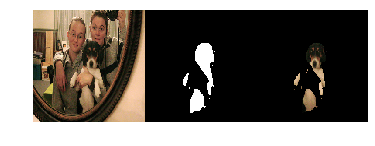

In [16]:
plt.axis('off')
img = x[0]
msk = y[0].squeeze()
msk = np.stack((msk,)*3, axis=-1)

plt.imshow( np.concatenate([img, msk, img*msk], axis = 1))

In [17]:
def mean_iou(y_true, y_pred):
    yt0 = y_true[:,:,:,0]
    yp0 = K.cast(y_pred[:,:,:,0] > 0.5, 'float32')
    inter = tf.count_nonzero(tf.logical_and(tf.equal(yt0, 1), tf.equal(yp0, 1)))
    union = tf.count_nonzero(tf.add(yt0, yp0))
    iou = tf.where(tf.equal(union, 0), 1., tf.cast(inter/union, 'float32'))
    return iou

In [18]:
def unet(sz = (256, 256, 3)):
    x = Input(sz)
    inputs = x
  
    #down sampling 
    f = 8
    layers = []
  
    for i in range(0, 6):
        x = Conv2D(f, 3, activation='relu', padding='same') (x)
        x = Conv2D(f, 3, activation='relu', padding='same') (x)
        layers.append(x)
        x = MaxPooling2D() (x)
        f = f*2
    ff2 = 64 
  
    #bottleneck 
    j = len(layers) - 1
    x = Conv2D(f, 3, activation='relu', padding='same') (x)
    x = Conv2D(f, 3, activation='relu', padding='same') (x)
    x = Conv2DTranspose(ff2, 2, strides=(2, 2), padding='same') (x)
    x = Concatenate(axis=3)([x, layers[j]])
    j = j -1 
  
  #upsampling 
    for i in range(0, 5):
        ff2 = ff2//2
        f = f // 2 
        x = Conv2D(f, 3, activation='relu', padding='same') (x)
        x = Conv2D(f, 3, activation='relu', padding='same') (x)
        x = Conv2DTranspose(ff2, 2, strides=(2, 2), padding='same') (x)
        x = Concatenate(axis=3)([x, layers[j]])
        j = j -1 
    
  
    #classification 
    x = Conv2D(f, 3, activation='relu', padding='same') (x)
    x = Conv2D(f, 3, activation='relu', padding='same') (x)
    outputs = Conv2D(1, 1, activation='sigmoid') (x)
    #model creation 
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [mean_iou])
  
    return model





In [19]:
model = unet()

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
def build_callbacks():
        checkpointer = ModelCheckpoint(filepath='unet.h5', verbose=1, save_best_only=True, save_weights_only=True)
        callbacks = [checkpointer, PlotLearning()]
        return callbacks

# inheritance for training process plot 
class PlotLearning(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        #self.fig = plt.figure()
        self.logs = []
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('mean_iou'))
        self.val_acc.append(logs.get('val_mean_iou'))
        self.i += 1
        print('i=',self.i,'loss=',logs.get('loss'),'val_loss=',logs.get('val_loss'),'mean_iou=',logs.get('mean_iou'),'val_mean_iou=',logs.get('val_mean_iou'))
        
        #choose a random test image and preprocess
        path = np.random.choice(test_files)
        raw = Image.open(f'images/{path}')
        raw = np.array(raw.resize((256, 256)))/255.
        raw = raw[:,:,0:3]
        
        #predict the mask 
        pred = model.predict(np.expand_dims(raw, 0))
        
        #mask post-processing 
        msk  = pred.squeeze()
        msk = np.stack((msk,)*3, axis=-1)
        msk[msk >= 0.5] = 1 
        msk[msk < 0.5] = 0 
        
        #show the mask and the segmented image 
        combined = np.concatenate([raw, msk, raw* msk], axis = 1)
        plt.axis('off')
        plt.imshow(combined)
        plt.show()

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
219/219 [==============================] - 54s 248ms/step - loss: 0.5738 - mean_iou: 0.1256 - val_loss: 0.4383 - val_mean_iou: 0.4868
i= 1 loss= 0.5738392873713959 val_loss= 0.4383312301202254 mean_iou= 0.12555381957653394 val_mean_iou= 0.48684097691015765


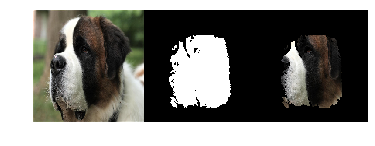

Epoch 2/30
219/219 [==============================] - 49s 224ms/step - loss: 0.4567 - mean_iou: 0.4444 - val_loss: 0.4385 - val_mean_iou: 0.4562
i= 2 loss= 0.45668803352743526 val_loss= 0.4385150291702964 mean_iou= 0.4444463828229877 val_mean_iou= 0.4561939537525177


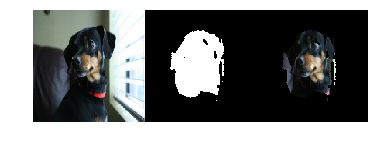

Epoch 3/30
219/219 [==============================] - 54s 248ms/step - loss: 0.4303 - mean_iou: 0.4609 - val_loss: 0.4012 - val_mean_iou: 0.5008
i= 3 loss= 0.4302801664017107 val_loss= 0.40119471875104035 mean_iou= 0.4609204719872235 val_mean_iou= 0.5008040504022078


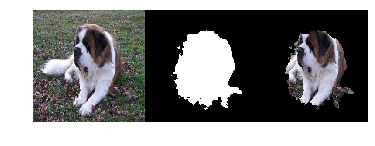

Epoch 4/30
219/219 [==============================] - 51s 233ms/step - loss: 0.3923 - mean_iou: 0.5100 - val_loss: 0.4007 - val_mean_iou: 0.5877
i= 4 loss= 0.392348667666248 val_loss= 0.40073511546308344 mean_iou= 0.5100233969895263 val_mean_iou= 0.5876537127928301


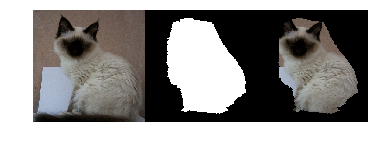

Epoch 5/30
219/219 [==============================] - 51s 231ms/step - loss: 0.3514 - mean_iou: 0.5810 - val_loss: 0.3312 - val_mean_iou: 0.6125
i= 5 loss= 0.3514431453050544 val_loss= 0.3312300524928353 mean_iou= 0.5810474898989342 val_mean_iou= 0.6125101718035612


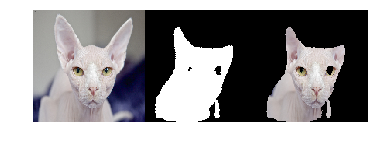

Epoch 6/30
219/219 [==============================] - 62s 285ms/step - loss: 0.3170 - mean_iou: 0.6271 - val_loss: 0.3146 - val_mean_iou: 0.6667
i= 6 loss= 0.31698007663907524 val_loss= 0.3146120553666895 mean_iou= 0.6270910335458033 val_mean_iou= 0.666651113466783


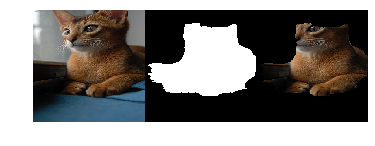

Epoch 7/30
219/219 [==============================] - 56s 256ms/step - loss: 0.2884 - mean_iou: 0.6578 - val_loss: 0.3231 - val_mean_iou: 0.6072
i= 7 loss= 0.2884275134839968 val_loss= 0.3230672966350209 mean_iou= 0.6577703404372142 val_mean_iou= 0.6072112267667596


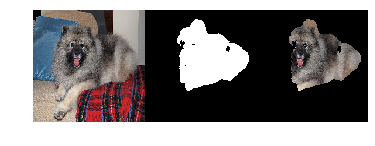

Epoch 8/30
219/219 [==============================] - 51s 231ms/step - loss: 0.2643 - mean_iou: 0.6900 - val_loss: 0.2548 - val_mean_iou: 0.7132
i= 8 loss= 0.26430263618628186 val_loss= 0.2548144893212752 mean_iou= 0.6900194118556366 val_mean_iou= 0.713173660365018


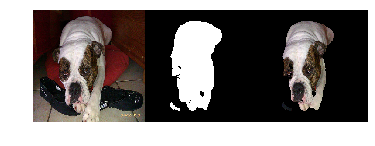

Epoch 9/30
219/219 [==============================] - 54s 249ms/step - loss: 0.2458 - mean_iou: 0.7129 - val_loss: 0.2441 - val_mean_iou: 0.7374
i= 9 loss= 0.2457852451360389 val_loss= 0.2441075173291293 mean_iou= 0.7128561650781327 val_mean_iou= 0.7374492450193926


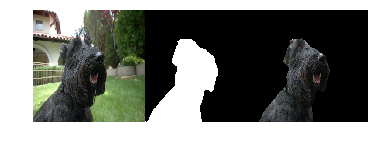

Epoch 10/30
219/219 [==============================] - 63s 288ms/step - loss: 0.2274 - mean_iou: 0.7299 - val_loss: 0.2736 - val_mean_iou: 0.7061
i= 10 loss= 0.22739464799835257 val_loss= 0.27360397441820666 mean_iou= 0.7299354103602231 val_mean_iou= 0.7061064405874773


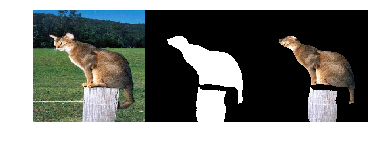

Epoch 11/30
219/219 [==============================] - 54s 246ms/step - loss: 0.2083 - mean_iou: 0.7506 - val_loss: 0.2537 - val_mean_iou: 0.7425
i= 11 loss= 0.20832483742607238 val_loss= 0.25372900475155225 mean_iou= 0.7506020599848604 val_mean_iou= 0.7425292784517462


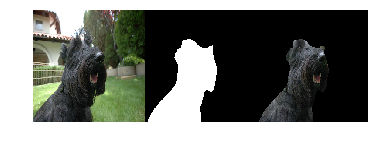

Epoch 12/30
219/219 [==============================] - 53s 243ms/step - loss: 0.2019 - mean_iou: 0.7590 - val_loss: 0.2057 - val_mean_iou: 0.7502
i= 12 loss= 0.2018720364733918 val_loss= 0.20571676980365405 mean_iou= 0.7589617586571332 val_mean_iou= 0.7502279823476617


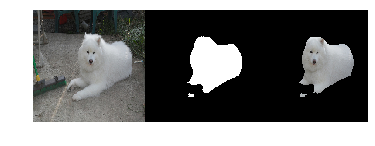

Epoch 13/30
219/219 [==============================] - 63s 286ms/step - loss: 0.1929 - mean_iou: 0.7735 - val_loss: 0.2641 - val_mean_iou: 0.7048
i= 13 loss= 0.19291843960410385 val_loss= 0.26405144008723175 mean_iou= 0.773534879836862 val_mean_iou= 0.7048465501178395


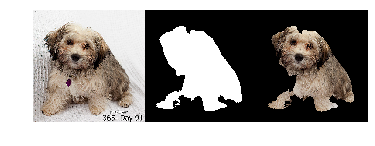

Epoch 14/30
219/219 [==============================] - 64s 294ms/step - loss: 0.1787 - mean_iou: 0.7846 - val_loss: 0.2340 - val_mean_iou: 0.7345
i= 14 loss= 0.17866720514346476 val_loss= 0.23401947725902905 mean_iou= 0.7846005066344727 val_mean_iou= 0.7344767342914235


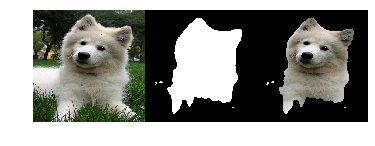

Epoch 15/30
219/219 [==============================] - 63s 286ms/step - loss: 0.1673 - mean_iou: 0.7967 - val_loss: 0.2220 - val_mean_iou: 0.7476
i= 15 loss= 0.16728732649866304 val_loss= 0.22198018702593716 mean_iou= 0.7967169527049478 val_mean_iou= 0.747628780928525


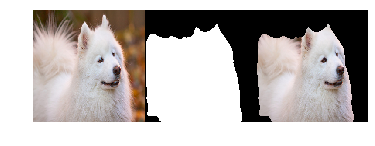

Epoch 16/30
219/219 [==============================] - 55s 252ms/step - loss: 0.1614 - mean_iou: 0.8036 - val_loss: 0.2122 - val_mean_iou: 0.7586
i= 16 loss= 0.16142332349738028 val_loss= 0.21217204494909805 mean_iou= 0.8036200698107889 val_mean_iou= 0.7586492137475447


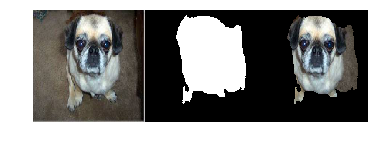

Epoch 17/30
219/219 [==============================] - 57s 258ms/step - loss: 0.1586 - mean_iou: 0.8066 - val_loss: 0.2560 - val_mean_iou: 0.7295
i= 17 loss= 0.15858555255143064 val_loss= 0.25595501878044824 mean_iou= 0.8065587294428316 val_mean_iou= 0.729511943730441


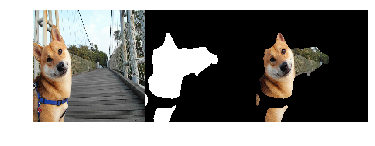

Epoch 18/30
219/219 [==============================] - 52s 235ms/step - loss: 0.1465 - mean_iou: 0.8191 - val_loss: 0.2225 - val_mean_iou: 0.7478
i= 18 loss= 0.1465228367681917 val_loss= 0.22249255803498355 mean_iou= 0.8190962136063946 val_mean_iou= 0.7477814663540233


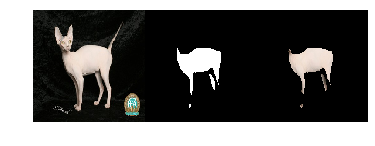

Epoch 19/30
219/219 [==============================] - 53s 243ms/step - loss: 0.1429 - mean_iou: 0.8249 - val_loss: 0.1972 - val_mean_iou: 0.7618
i= 19 loss= 0.14286743407244007 val_loss= 0.19723788445646112 mean_iou= 0.8248573650508166 val_mean_iou= 0.7617895278063688


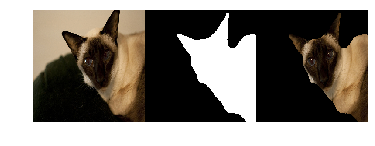

Epoch 20/30
219/219 [==============================] - 50s 230ms/step - loss: 0.1370 - mean_iou: 0.8313 - val_loss: 0.2244 - val_mean_iou: 0.7711
i= 20 loss= 0.13699428618090337 val_loss= 0.22444741969758814 mean_iou= 0.8312825778303625 val_mean_iou= 0.7710722901604392


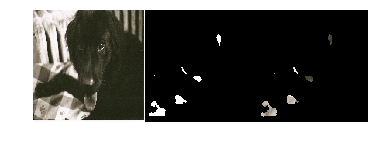

Epoch 21/30
219/219 [==============================] - 50s 228ms/step - loss: 0.1307 - mean_iou: 0.8399 - val_loss: 0.1856 - val_mean_iou: 0.7801
i= 21 loss= 0.13065352876028513 val_loss= 0.18557181006128137 mean_iou= 0.8398790658881131 val_mean_iou= 0.7801324887709185


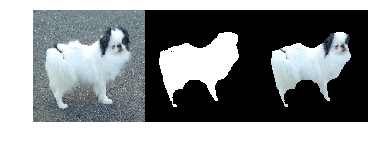

Epoch 22/30
219/219 [==============================] - 52s 236ms/step - loss: 0.1253 - mean_iou: 0.8438 - val_loss: 0.2031 - val_mean_iou: 0.7775
i= 22 loss= 0.12525782635494997 val_loss= 0.20311419665813446 mean_iou= 0.8437566321734424 val_mean_iou= 0.7774742895906622


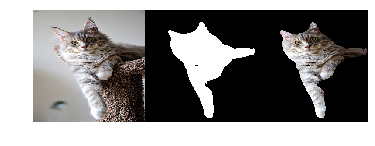

Epoch 23/30
219/219 [==============================] - 50s 230ms/step - loss: 0.1205 - mean_iou: 0.8498 - val_loss: 0.2492 - val_mean_iou: 0.7703
i= 23 loss= 0.12053598902405124 val_loss= 0.2492299350825223 mean_iou= 0.8498053760289057 val_mean_iou= 0.7703059694983743


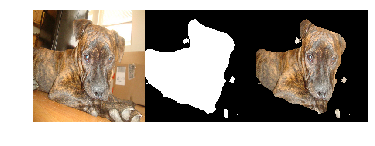

Epoch 24/30
219/219 [==============================] - 50s 227ms/step - loss: 0.1170 - mean_iou: 0.8516 - val_loss: 0.2243 - val_mean_iou: 0.7794
i= 24 loss= 0.11702262225760716 val_loss= 0.2242595539851622 mean_iou= 0.8516315031269369 val_mean_iou= 0.7794208960099653


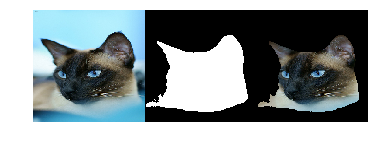

Epoch 25/30
219/219 [==============================] - 51s 231ms/step - loss: 0.1158 - mean_iou: 0.8555 - val_loss: 0.2366 - val_mean_iou: 0.7581
i= 25 loss= 0.11578083711944215 val_loss= 0.23657287115400488 mean_iou= 0.8555002351329751 val_mean_iou= 0.7580516338348389


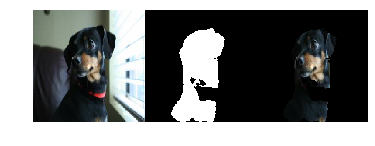

Epoch 26/30
219/219 [==============================] - 50s 229ms/step - loss: 0.1096 - mean_iou: 0.8609 - val_loss: 0.3222 - val_mean_iou: 0.6675
i= 26 loss= 0.10962342967589696 val_loss= 0.3222484886646271 mean_iou= 0.8608595930278029 val_mean_iou= 0.6675482013008811


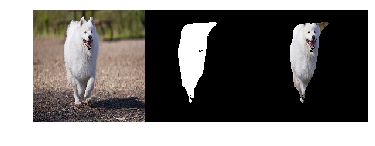

Epoch 27/30
219/219 [==============================] - 51s 232ms/step - loss: 0.1025 - mean_iou: 0.8675 - val_loss: 0.2318 - val_mean_iou: 0.7707
i= 27 loss= 0.10245464085580007 val_loss= 0.23175876519896768 mean_iou= 0.8675066774294257 val_mean_iou= 0.7706620313904502


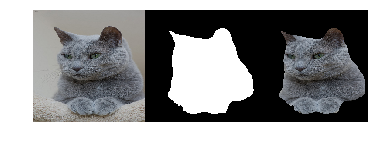

Epoch 28/30
219/219 [==============================] - 53s 241ms/step - loss: 0.1027 - mean_iou: 0.8690 - val_loss: 0.2395 - val_mean_iou: 0.7765
i= 28 loss= 0.1027343825322308 val_loss= 0.23952079090205106 mean_iou= 0.8689789034460234 val_mean_iou= 0.7764616012573242


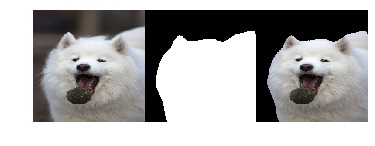

Epoch 29/30
219/219 [==============================] - 51s 235ms/step - loss: 0.0982 - mean_iou: 0.8741 - val_loss: 0.2259 - val_mean_iou: 0.7749
i= 29 loss= 0.09821507242852695 val_loss= 0.22594871439717032 mean_iou= 0.8740891308000643 val_mean_iou= 0.7748511975461786


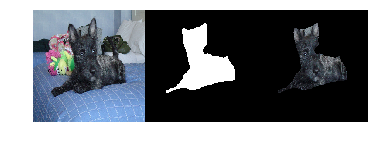

Epoch 30/30
219/219 [==============================] - 51s 232ms/step - loss: 0.0964 - mean_iou: 0.8773 - val_loss: 0.2128 - val_mean_iou: 0.7908
i= 30 loss= 0.09638401222963856 val_loss= 0.2128490155393427 mean_iou= 0.8772561381396637 val_mean_iou= 0.7907613678412004


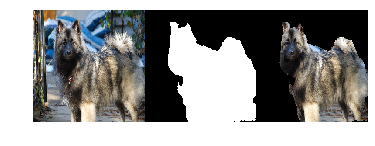

In [21]:
train_steps = len(train_files) //batch_size
test_steps = len(test_files) //batch_size
model.fit_generator(train_generator, 
                    epochs = 30, steps_per_epoch = train_steps,validation_data = test_generator, validation_steps = test_steps,
                    callbacks = build_callbacks(), verbose = 1)


In [22]:
!wget http://r.ddmcdn.com/s_f/o_1/cx_462/cy_245/cw_1349/ch_1349/w_720/APL/uploads/2015/06/caturday-shutterstock_149320799.jpg -O test.jpg


--2019-05-20 00:24:59--  http://r.ddmcdn.com/s_f/o_1/cx_462/cy_245/cw_1349/ch_1349/w_720/APL/uploads/2015/06/caturday-shutterstock_149320799.jpg
Resolving r.ddmcdn.com (r.ddmcdn.com)... 99.84.239.88, 99.84.239.90, 99.84.239.104, ...
Connecting to r.ddmcdn.com (r.ddmcdn.com)|99.84.239.88|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63219 (62K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  61.74K   401KB/s    in 0.2s    

2019-05-20 00:25:00 (401 KB/s) - ‘test.jpg’ saved [63219/63219]



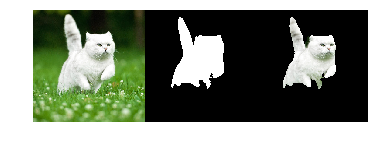

In [23]:
raw = Image.open('test.jpg')
raw = np.array(raw.resize((256, 256)))/255.
raw = raw[:,:,0:3]

#predict the mask 
pred = model.predict(np.expand_dims(raw, 0))

#mask post-processing 
msk  = pred.squeeze()
msk = np.stack((msk,)*3, axis=-1)
msk[msk >= 0.5] = 1 
msk[msk < 0.5] = 0 

#show the mask and the segmented image 
combined = np.concatenate([raw, msk, raw* msk], axis = 1)
plt.axis('off')
plt.imshow(combined)
plt.show()